- **Name:** Jhon Allen Pabalinas
- **Term:** 2nd AY 2024-2025

# Laboratory Experiment 004: Non-Linear Applications of Op-Amps
This notebook demonstrates the working of comparators, oscillators, and active filters using Python simulations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, square

## Comparator Simulation
A comparator is an op-amp circuit that compares two voltages and switches the output accordingly.

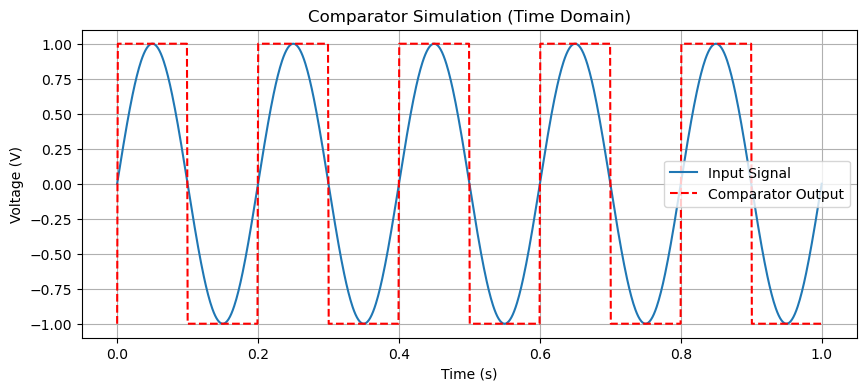

In [3]:
### Comparator Simulation
import numpy as np
import matplotlib.pyplot as plt

def comparator(input_signal, threshold):
    """ Simulates a comparator that outputs high or low based on the threshold """
    return np.where(input_signal > threshold, 1, -1)

# Define parameters
time = np.linspace(0, 1, 1000)  # Time vector
input_signal = np.sin(2 * np.pi * 5 * time)  # Input signal
threshold = 0

# Compute comparator output
comparator_output = comparator(input_signal, threshold)

# Visualization
plt.figure(figsize=(10, 4))
plt.plot(time, input_signal, label='Input Signal')
plt.plot(time, comparator_output, label='Comparator Output', linestyle='dashed', color='r')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Comparator Simulation (Time Domain)')
plt.grid()
plt.legend()
plt.show()


## Wien Bridge Oscillator Simulation
A Wien Bridge Oscillator generates sine waves without requiring an external input signal.

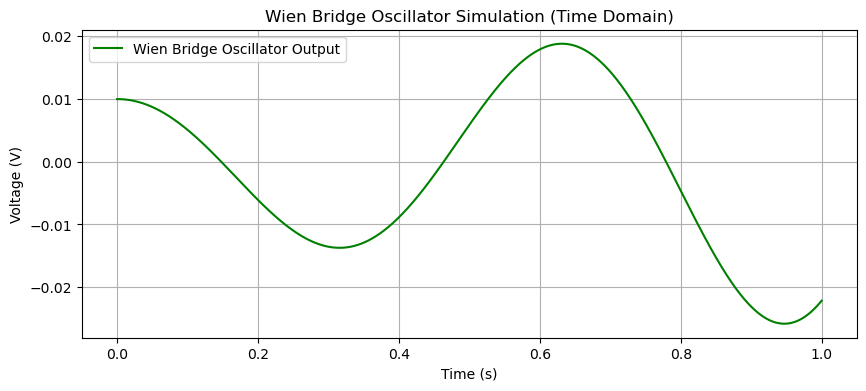

In [6]:
### Wien Bridge Oscillator Simulation
from scipy.integrate import solve_ivp

def wien_bridge_oscillator(t, y, R, C, A):
    """ Simulates a Wien Bridge Oscillator """
    Vout, dVout_dt = y
    d2Vout_dt2 = (A - 1) * dVout_dt - Vout / (R * C)
    return [dVout_dt, d2Vout_dt2]

# Define parameters for Wien Bridge Oscillator
R, C, A = 10e3, 1e-6, 3  # Resistance, Capacitance, Amplification factor

# Solve the differential equation
solution = solve_ivp(wien_bridge_oscillator, [0, 1], [0.01, 0], args=(R, C, A), t_eval=time)

# Extract the output signal
oscillator_output = solution.y[0]

# Visualization
plt.figure(figsize=(10, 4))
plt.plot(time, oscillator_output, label='Wien Bridge Oscillator Output', color='g')
plt.xlabel('Time (s)')
plt.ylabel('Voltage (V)')
plt.title('Wien Bridge Oscillator Simulation (Time Domain)')
plt.grid()
plt.legend()
plt.show()


## Filter Implementations
Functions to implement low-pass, high-pass, band-pass, and band-stop filters.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, freqz

def butter_filter_freq_response(cutoff, fs, filter_type, order=2):
    """ Computes and plots the frequency response of a Butterworth filter """
    nyq = 0.5 * fs
    normal_cutoff = np.array(cutoff) / nyq
    b, a = butter(order, normal_cutoff, btype=filter_type, analog=False)
    
    # Compute frequency response
    w, h = freqz(b, a, worN=1024)
    freq = w * fs / (2 * np.pi)  # Convert to Hz

    return freq, abs(h)  # Magnitude response


## Visualization
The following plots show the outputs of the comparator, oscillator, and various filters.

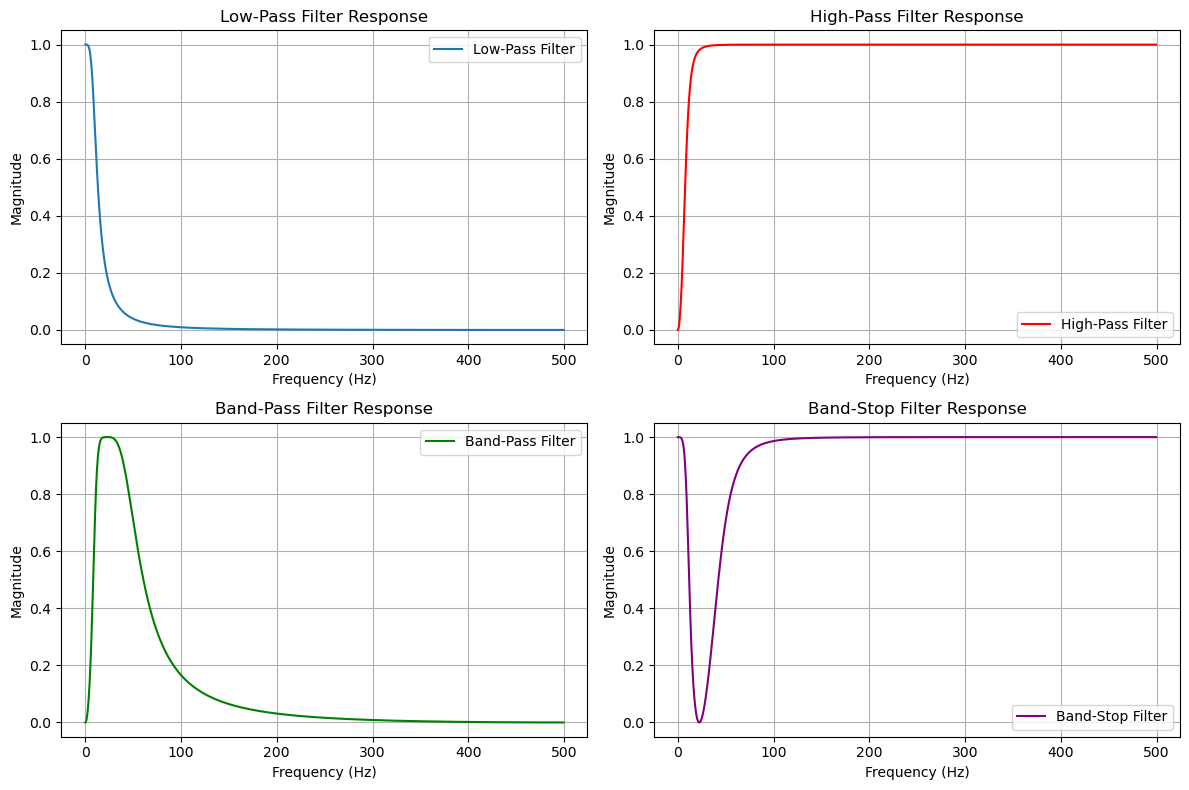

In [12]:
# Ensure frequency responses are computed before plotting
fs = 1000  # Sampling frequency

low_pass_freq, low_pass_response = butter_filter_freq_response(10, fs, 'low')
high_pass_freq, high_pass_response = butter_filter_freq_response(10, fs, 'high')
band_pass_freq, band_pass_response = butter_filter_freq_response([10, 50], fs, 'bandpass')
band_stop_freq, band_stop_response = butter_filter_freq_response([10, 50], fs, 'bandstop')

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(low_pass_freq, low_pass_response, label='Low-Pass Filter')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Low-Pass Filter Response')
plt.grid()
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(high_pass_freq, high_pass_response, label='High-Pass Filter', color='r')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('High-Pass Filter Response')
plt.grid()
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(band_pass_freq, band_pass_response, label='Band-Pass Filter', color='g')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Band-Pass Filter Response')
plt.grid()
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(band_stop_freq, band_stop_response, label='Band-Stop Filter', color='purple')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Band-Stop Filter Response')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()
